In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
from torch.optim import Adam
import torch.nn as nn
import os

# Veri yükleme ve ön işleme
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

views = ['/content/drive/MyDrive/Dataset/kompozisyon_dataset/RCC', '/content/drive/MyDrive/Dataset/kompozisyon_dataset/LCC', '/content/drive/MyDrive/Dataset/kompozisyon_dataset/RMLO', '/content/drive/MyDrive/Dataset/kompozisyon_dataset/LMLO']
train_datasets = []
test_datasets = []
valid_datasets = []

for view in views:
    train_path = os.path.join(view, 'train')
    test_path = os.path.join(view, 'test')
    valid_path = os.path.join(view, 'valid')

    train_datasets.append(ImageFolder(train_path, transform=data_transform))
    test_datasets.append(ImageFolder(test_path, transform=data_transform))
    valid_datasets.append(ImageFolder(valid_path, transform=data_transform))

train_dataset = ConcatDataset(train_datasets)
test_dataset = ConcatDataset(test_datasets)
valid_dataset = ConcatDataset(valid_datasets)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.optim as optim

class MultiViewDataset(Dataset):
    def __init__(self, root, mode, transform=None):
        self.root = root
        self.transform = transform
        self.rcc = ImageFolder(os.path.join(root, "RCC", mode), transform=self.transform)
        self.lcc = ImageFolder(os.path.join(root, "LCC", mode), transform=self.transform)
        self.rmlo = ImageFolder(os.path.join(root, "RMLO", mode), transform=self.transform)
        self.lmlo = ImageFolder(os.path.join(root, "LMLO", mode), transform=self.transform)

    def __getitem__(self, index):
        img_rcc, label = self.rcc[index]
        img_lcc, _ = self.lcc[index]
        img_rmlo, _ = self.rmlo[index]
        img_lmlo, _ = self.lmlo[index]
        return (img_rcc, img_lcc, img_rmlo, img_lmlo), label

    def __len__(self):
        return len(self.rcc)

# Dönüşüm işlemleri
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

In [ ]:
vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 114MB/s] 


In [ ]:
vgg16.classifier[6].out_features = 4

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
MultiViewVGG16()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MultiViewVGG16(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
     

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiViewVGG16(nn.Module):
    def __init__(self, num_classes=4):
        super(MultiViewVGG16, self).__init__()

        self.vgg16 = models.vgg16(pretrained=True)
        self.vgg16.classifier = nn.Sequential(*list(self.vgg16.classifier.children())[:-1])

        self.dropout = nn.Dropout(0.4)
        self.classifier = nn.Linear(4096 * 4, num_classes)

    def forward(self, x1, x2, x3, x4):
        x1 = self.vgg16(x1)
        x2 = self.vgg16(x2)
        x3 = self.vgg16(x3)
        x4 = self.vgg16(x4)

        x = torch.cat((x1, x2, x3, x4), dim=1)
        x = self.dropout(x)
        x = self.classifier(x)

        return x

In [ ]:
data_root = "/content/drive/MyDrive/Dataset/kompozisyon_dataset"
train_set = MultiViewDataset(data_root, "train", transform=transform)
test_set = MultiViewDataset(data_root, "test", transform=transform)
valid_set = MultiViewDataset(data_root, "valid", transform=transform)

In [ ]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)
valid_loader = DataLoader(valid_set, batch_size=16, shuffle=False)

In [ ]:
len(train_loader), len(test_loader), len(valid_loader)

(105, 20, 20)

In [ ]:
# data_root = "/content/drive/MyDrive/Dataset/kompozisyon_dataset"
# train_set = MultiViewDataset(data_root, "train", transform=transform)
# test_set = MultiViewDataset(data_root, "test", transform=transform)
# valid_set = MultiViewDataset(data_root, "valid", transform=transform)

# train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_set, batch_size=32, shuffle=False)
# valid_loader = DataLoader(valid_set, batch_size=32, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MultiViewVGG16(num_classes=4)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.999)

num_epochs = 40

best_accuracy = 0
save_path = "/content/drive/MyDrive/Dataset/kompozisyon_dataset/best_model.pth"

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = [img.to(device) for img in images]
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(*images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = [img.to(device) for img in images]
            labels = labels.to(device)

            outputs = model(*images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / (i + 1)} Validation accuracy: {accuracy * 100:.2f}%")

    torch.save(model.state_dict(), f"/content/drive/MyDrive/tubitak/epoch_{epoch+1}.pth")
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), save_path)
        print(f"Best model saved with accuracy: {best_accuracy * 100:.2f}%")

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 63.0MB/s]


Epoch [1/40], Loss: 0.8003411571184794 Validation accuracy: 83.75%
Best model saved with accuracy: 83.75%
Epoch [2/40], Loss: 0.39728698773043497 Validation accuracy: 89.06%
Best model saved with accuracy: 89.06%
Epoch [3/40], Loss: 0.33918641933373045 Validation accuracy: 91.88%
Best model saved with accuracy: 91.88%
Epoch [4/40], Loss: 0.2779936034941957 Validation accuracy: 88.44%
Epoch [5/40], Loss: 0.20713727268434706 Validation accuracy: 88.12%
Epoch [6/40], Loss: 0.22390723098956403 Validation accuracy: 88.75%
Epoch [7/40], Loss: 0.1395966226501124 Validation accuracy: 86.88%
Epoch [8/40], Loss: 0.1694123726515543 Validation accuracy: 91.25%
Epoch [9/40], Loss: 0.10650082417719421 Validation accuracy: 88.75%
Epoch [10/40], Loss: 0.11320550578335921 Validation accuracy: 87.81%
Epoch [11/40], Loss: 0.06316722424013452 Validation accuracy: 85.62%
Epoch [12/40], Loss: 0.06431852507271937 Validation accuracy: 91.56%
Epoch [13/40], Loss: 0.054168751668961096 Validation accuracy: 90.00

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the best model
model.load_state_dict(torch.load(save_path))
model.to(device)

# Test
test_set = MultiViewDataset(data_root, "test", transform=transform)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)

model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for images, labels in test_loader:
        images = [img.to(device) for img in images]
        labels = labels.to(device)

        outputs = model(*images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

CM = confusion_matrix(actuals, predictions)
print(CM)

FP = CM.sum(axis=0) - np.diag(CM)
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
recall = TP/(TP+FN)*100
precision = TP/(TP+FP)*100
specificity = TN/(TN+FP)*100
acc = (TP+TN)/(TP+TN+FP+FN)*100
print(f'\nSpecificty: {specificity}, Mean Specificity: {np.nanmean(specificity)}')
print(f'\nRecall: {recall}, Mean Recall: {np.nanmean(recall)}')
print(f'\nPrecision: {precision}, Mean Precision: {np.nanmean(precision)}')
print(f'\nAccuracy: {acc}, Mean Accuracy: {np.nanmean(acc)}')
print(f'\nF1 Score: {((2*recall*precision)/(recall+precision))}, Mean F1-Score: {np.nanmean(((2*recall*precision)/(recall+precision)))}' )


[[63 17  0  0]
 [ 2 76  2  0]
 [ 0  0 76  4]
 [ 0  0  3 77]]

Specificty: [99.16666667 92.91666667 97.91666667 98.33333333], Mean Specificity: 97.08333333333333

Recall: [78.75 95.   95.   96.25], Mean Recall: 91.25

Precision: [96.92307692 81.72043011 93.82716049 95.0617284 ], Mean Precision: 91.88309897987317

Accuracy: [94.0625 93.4375 97.1875 97.8125], Mean Accuracy: 95.625

F1 Score: [86.89655172 87.86127168 94.40993789 95.65217391], Mean F1-Score: 91.2049838004202


In [ ]:
type(actuals)

list

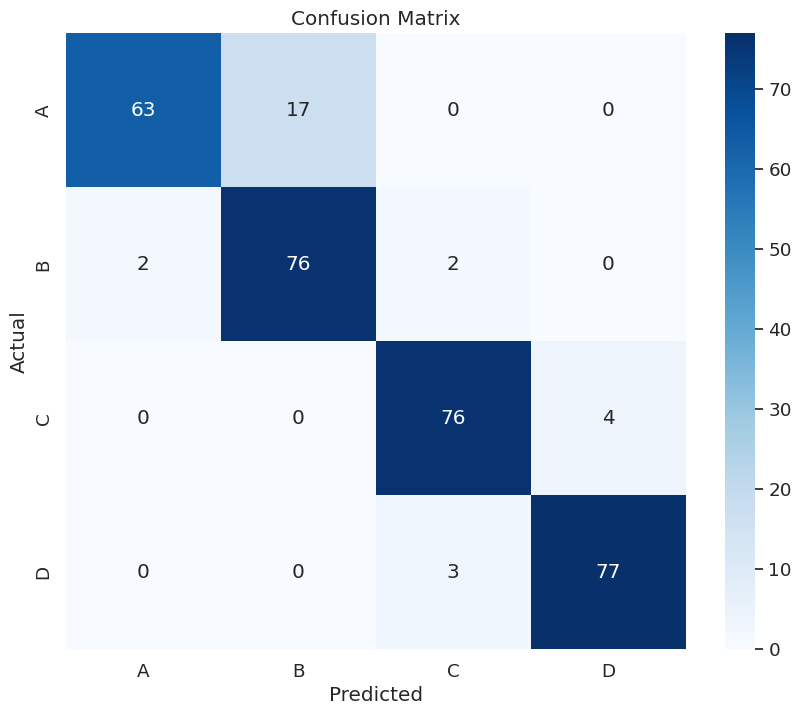

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
confusion_mtx = confusion_matrix(actuals, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', xticklabels=["A","B","C","D"], yticklabels=["A","B","C","D"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
